<h1 style = 'color: #EEE3AB'>Creating Linear Regression </h1>

In [80]:
## Importing necessary Libraries
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [81]:
## Loading the dataset
data = load_diabetes()
X,Y = load_diabetes(return_X_y = True)

In [82]:
## Creating Features and Target Dataframe
X_df = pd.DataFrame(X, columns = data.feature_names )
Y_df = pd.DataFrame(Y, columns= ['Target'])

In [83]:
## Creating Database
df = pd.concat((X_df, Y_df), axis = 1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [84]:
## Creating a Target metrix for correlation analysis
Target_metrix = df.corr()[['Target']].drop('Target').T

<Axes: >

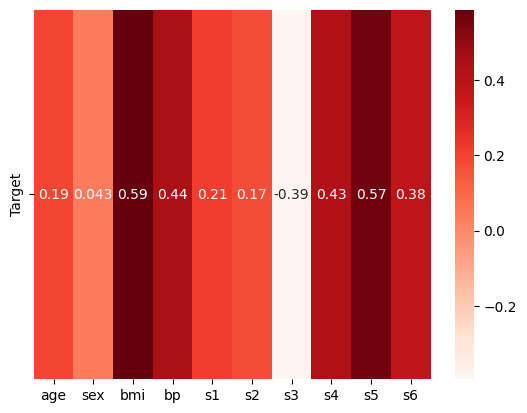

In [85]:
## Checking Correlation b/w Target and Features
sns.heatmap(Target_metrix, annot = True, cmap = 'Reds')

Mostly Features are not very corelated (linearly related) to use linear regression here but still am just creating the model beyond this data and so obviously accuracy will come low

<h2 style = 'color : Orange'>Checking Original Model Performance</h2>

In [86]:
## Splitting my data into train and test
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(df.drop('Target', axis = 1), df.Target, test_size = 0.2)

In [87]:
## Training the data and check accuracy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
r2_score(y_pred, Y_test)

-0.043723834005138684

In [88]:
## Checking the slope and intercept
print(lr.coef_)
print(lr.intercept_)

[  28.95221633 -249.63866163  554.3601135   309.37169684 -759.36287042
  460.02862364   99.70170312  214.90251045  706.52299117   43.04565402]
153.16981280852764


In [89]:
## Cross Validating the accuracy
r2_avg_score = []

## Looping the data
for i in range(5):
    ## Splitting my data into train and test
    from sklearn.model_selection import train_test_split
    X_train , X_test, Y_train, Y_test = train_test_split(df.drop('Target', axis = 1), df.Target, test_size = 0.2)

    ## Fitting my data and predict the value
    lr = LinearRegression()
    lr.fit(X, Y)
    y_pred = lr.predict(X_test)
    r2_avg_score.append(r2_score(y_pred, Y_test))
print(np.mean(r2_avg_score))

0.04939827388474638


C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\shane\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [90]:
## Creating myOwnLinear Model
class myRegressor:
    def __init__(self):
        self.m = 0
        self.b = 0

    ## defining the fit method

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis = 1)
        beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
        self.b = beta[0]
        self.m = beta[1:]
    
    ## defining the predict method

    
    def predict(self, x):
        return self.b + np.dot(x, self.m)

<b>To Know the maths behind the model </b>
<a href = 'https://www.youtube.com/watch?v=VmZWXzxmNrE&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=55' style = 'color: green'>Visit This Video</a>

In [91]:
## Checking accuracy of my model
myR = myRegressor()
myR.fit(X,Y)
my_y_pred = myR.predict(X_test)
r2_score(my_y_pred, Y_test)

0.35333409070530997

In [92]:
## Checking accuracy of my model with the help of loops
## Creating variable to store the accuracy
r2_avg_score = []

## Looping the data
for i in range(5):
    ## Splitting my data into train and test
    from sklearn.model_selection import train_test_split
    X_train , X_test, Y_train, Y_test = train_test_split(df.drop('Target', axis = 1), df.Target, test_size = 0.2)

    myR = myRegressor()
    myR.fit(X, Y)
    y_pred = myR.predict(X_test)
    r2_avg_score.append(r2_score(y_pred, Y_test))
print(np.mean(r2_avg_score))

0.0840755207498485
